In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Stans_stocks.xlsx',
              # skiprows=0, 
              header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    106 non-null    datetime64[ns]
 1   FB      106 non-null    float64       
 2   FPL     106 non-null    float64       
 3   S&P500  106 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.4 KB


In [3]:
df.set_index('Date',inplace=True,drop=True)
cols_tbu=list(df.columns)

cols_tbu

['FB', 'FPL', 'S&P500']

In [4]:
df.loc[:,[i+'_lag_1' for i in cols_tbu]]=(df[cols_tbu].shift()).values
df.loc[:,[i+'_diff_1' for i in cols_tbu]]=(df[cols_tbu].values-df.loc[:,[i+'_lag_1' for i in cols_tbu]].values)
df.loc[:,[i+'_normalised_diff_1' for i in cols_tbu]]=(
                                                      (df.loc[:,[i+'_diff_1' for i in cols_tbu]].values)/
                                                      (df.loc[:,[i+'_lag_1' for i in cols_tbu]].values)
                                                      )
df

,FB,FPL,S&P500,FB_lag_1,FPL_lag_1,S&P500_lag_1,FB_diff_1,FPL_diff_1,S&P500_diff_1,FB_normalised_diff_1,FPL_normalised_diff_1,S&P500_normalised_diff_1
Date,,,,,,,,,,,,
2014-05-01,61.15,98.48,1883.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-02,60.46,96.53,1881.14,61.15,98.48,1883.68,-0.69,-1.95,-2.54,-0.011284,-0.019801,-0.001348
2014-05-05,61.22,96.49,1884.66,60.46,96.53,1881.14,0.76,-0.04,3.52,0.012570,-0.000414,0.001871
2014-05-06,58.53,96.40,1867.72,61.22,96.49,1884.66,-2.69,-0.09,-16.94,-0.043940,-0.000933,-0.008988
2014-05-07,57.39,97.78,1878.21,58.53,96.40,1867.72,-1.14,1.38,10.49,-0.019477,0.014315,0.005616
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-24,78.54,94.18,1998.30,78.29,94.55,1982.77,0.25,-0.37,15.53,0.003193,-0.003913,0.007832
2014-09-25,77.22,93.14,1965.99,78.54,94.18,1998.30,-1.32,-1.04,-32.31,-0.016807,-0.011043,-0.016169
2014-09-26,78.79,93.44,1982.85,77.22,93.14,1965.99,1.57,0.30,16.86,0.020332,0.003221,0.008576


,FB_diff_1_shift,FB_diff_1
FB_diff_1_shift,1.000000,-0.072809
FB_diff_1,-0.072809,1.000000


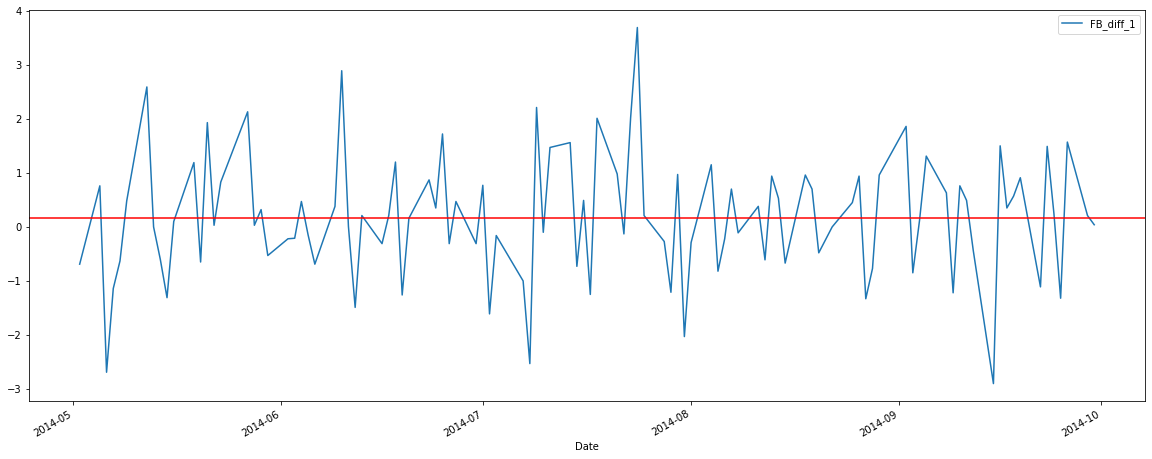

In [5]:
df[['FB_diff_1']].plot(figsize=(20,8))
plt.axhline(df['FB_diff_1'].mean(),color='red')#.value)
# df['FB_diff_1'].mean()
pd.concat([
           df['FB_diff_1'].shift().to_frame('FB_diff_1_shift'),df['FB_diff_1']
          ],axis=1).corr()

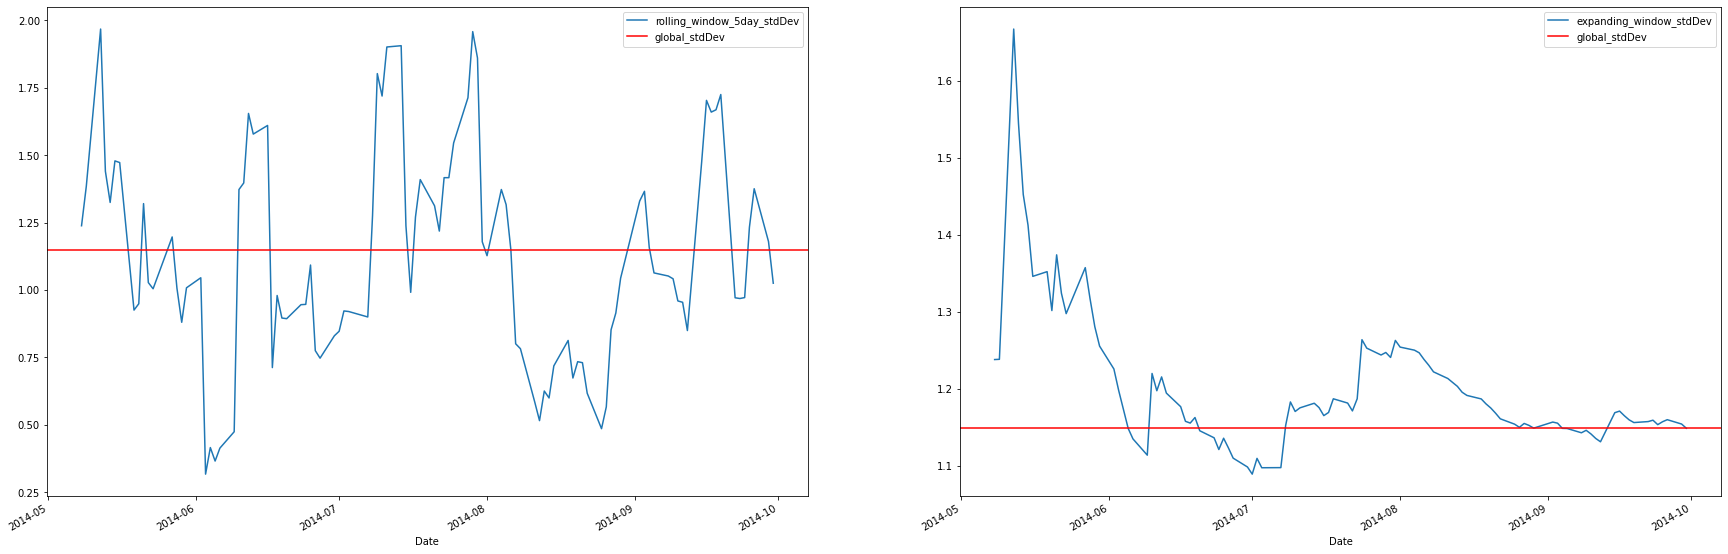

In [6]:
f,ax=plt.subplots(1,2,figsize=(30,10))

df['FB_diff_1'].rolling(5,min_periods=5).std().to_frame('rolling_window_5day_stdDev').plot(ax=ax[0])

df['FB_diff_1'].expanding(min_periods=5).std().to_frame('expanding_window_stdDev').plot(ax=ax[1])

ax[0].axhline(df['FB_diff_1'].std(),color='red',label='global_stdDev')
ax[0].legend()

ax[1].axhline(df['FB_diff_1'].std(),color='red',label='global_stdDev')
ax[1].legend()

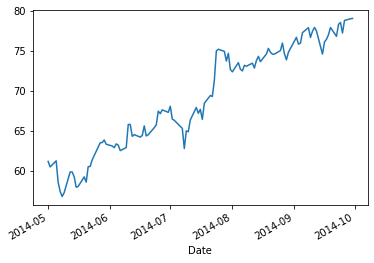

In [7]:
df.FB.plot()

# Geometric RandomWalk 

Will be detremined using normalised difference values

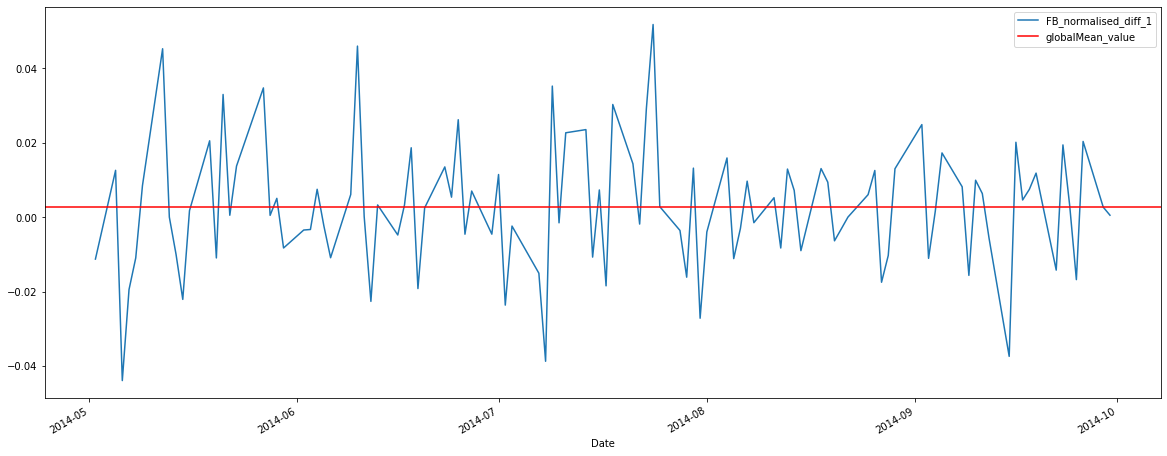

In [8]:
df[['FB_normalised_diff_1']].plot(figsize=(20,8))
plt.axhline(df['FB_normalised_diff_1'].mean(),
            color='red',label='globalMean_value')
plt.legend()

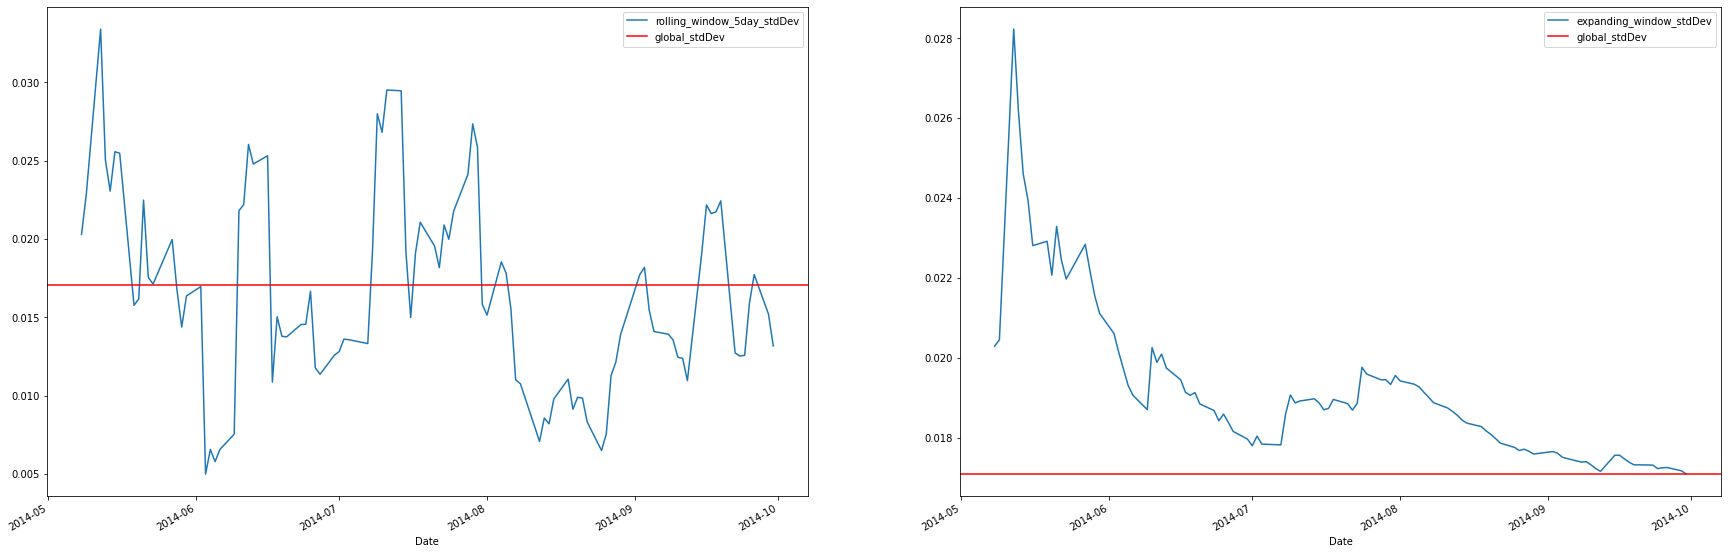

In [9]:
f,ax=plt.subplots(1,2,figsize=(30,10))

df['FB_normalised_diff_1'].rolling(5,min_periods=5).std().to_frame('rolling_window_5day_stdDev').plot(ax=ax[0])

df['FB_normalised_diff_1'].expanding(min_periods=5).std().to_frame('expanding_window_stdDev').plot(ax=ax[1])

ax[0].axhline(df['FB_normalised_diff_1'].std(),color='red',label='global_stdDev')
ax[0].legend()

ax[1].axhline(df['FB_normalised_diff_1'].std(),color='red',label='global_stdDev')
ax[1].legend()

In [10]:
pd.concat([
           df['FB_normalised_diff_1'].shift().to_frame('FB_normalised_diff_1_shift'),df['FB_normalised_diff_1']
          ],axis=1).corr()

,FB_normalised_diff_1_shift,FB_normalised_diff_1
FB_normalised_diff_1_shift,1.000000,-0.057272
FB_normalised_diff_1,-0.057272,1.000000


# ModelEvaluation on Log Values of FB series 

In [11]:
# df.drop([i+'_logg' for i in cols_tbu],axis=1,inplace=True)
df.loc[:,[i+'_log' for i in cols_tbu]]= (np.log(df[cols_tbu])).values#A geometric random walk which is a characteristic of trending series can be explained using random walk applied on log values 
# np.log(10)
df.loc[:,'FB_log_diff']=df['FB_log'].diff()
df

,FB,FPL,S&P500,FB_lag_1,FPL_lag_1,S&P500_lag_1,FB_diff_1,FPL_diff_1,S&P500_diff_1,FB_normalised_diff_1,FPL_normalised_diff_1,S&P500_normalised_diff_1,FB_log,FPL_log,S&P500_log,FB_log_diff
Date,,,,,,,,,,,,,,,,
2014-05-01,61.15,98.48,1883.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.113330,4.589853,7.540983,NaN
2014-05-02,60.46,96.53,1881.14,61.15,98.48,1883.68,-0.69,-1.95,-2.54,-0.011284,-0.019801,-0.001348,4.101982,4.569854,7.539633,-0.011348
2014-05-05,61.22,96.49,1884.66,60.46,96.53,1881.14,0.76,-0.04,3.52,0.012570,-0.000414,0.001871,4.114474,4.569439,7.541503,0.012492
2014-05-06,58.53,96.40,1867.72,61.22,96.49,1884.66,-2.69,-0.09,-16.94,-0.043940,-0.000933,-0.008988,4.069539,4.568506,7.532474,-0.044934
2014-05-07,57.39,97.78,1878.21,58.53,96.40,1867.72,-1.14,1.38,10.49,-0.019477,0.014315,0.005616,4.049870,4.582720,7.538074,-0.019669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-24,78.54,94.18,1998.30,78.29,94.55,1982.77,0.25,-0.37,15.53,0.003193,-0.003913,0.007832,4.363608,4.545208,7.600052,0.003188
2014-09-25,77.22,93.14,1965.99,78.54,94.18,1998.30,-1.32,-1.04,-32.31,-0.016807,-0.011043,-0.016169,4.346658,4.534104,7.583751,-0.016950
2014-09-26,78.79,93.44,1982.85,77.22,93.14,1965.99,1.57,0.30,16.86,0.020332,0.003221,0.008576,4.366786,4.537320,7.592290,0.020128


,FB_log_diff_shift,FB_log_diff
FB_log_diff_shift,1.000000,-0.057712
FB_log_diff,-0.057712,1.000000


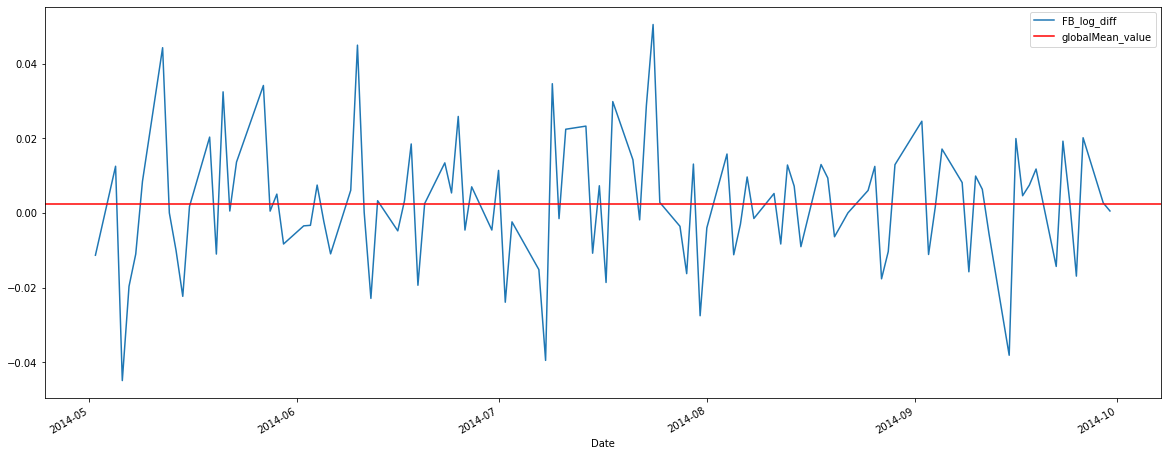

In [12]:
col='FB_log_diff'
df[[col]].plot(figsize=(20,8))
plt.axhline(df[col].mean(),
            color='red',label='globalMean_value')
plt.legend()


pd.concat([
           df[col].shift().to_frame(col+'_shift'),df[col]
          ],axis=1).corr()

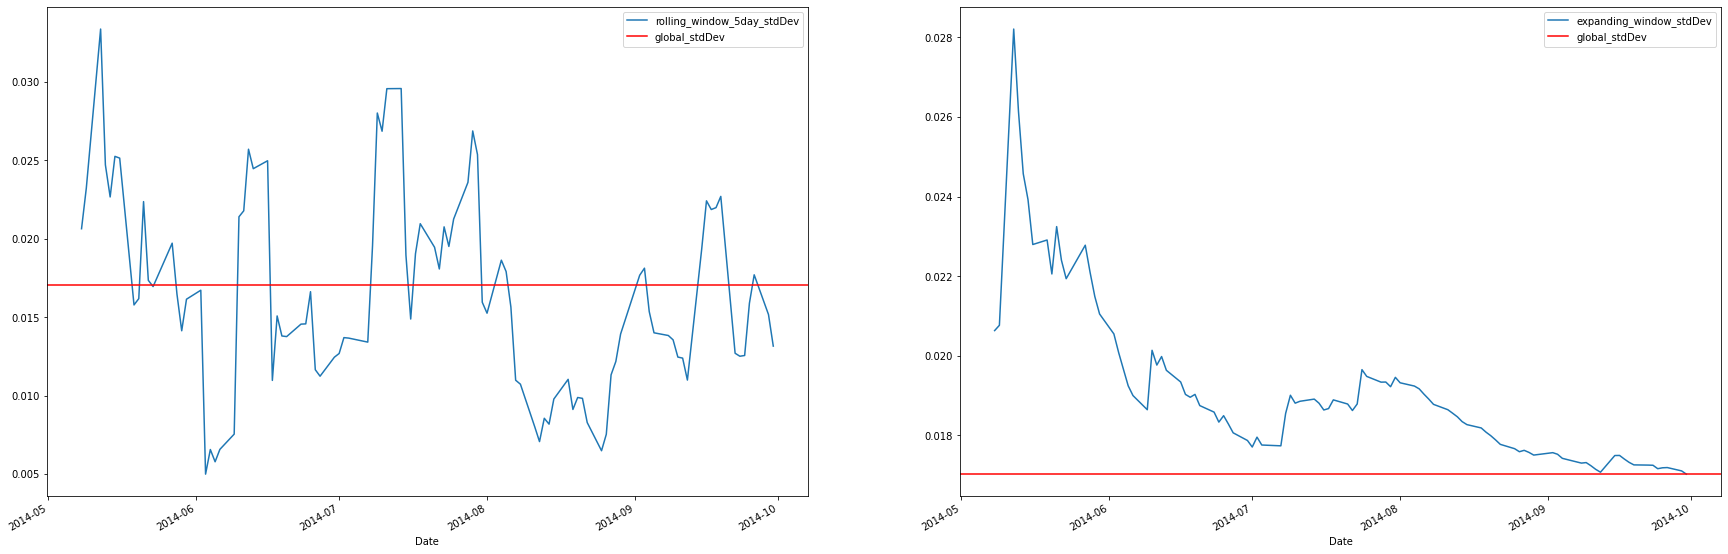

In [13]:
# Should have defined a function


f,ax=plt.subplots(1,2,figsize=(30,10))

df[col].rolling(5,min_periods=5).std().to_frame('rolling_window_5day_stdDev').plot(ax=ax[0])

df[col].expanding(min_periods=5).std().to_frame('expanding_window_stdDev').plot(ax=ax[1])

ax[0].axhline(df[col].std(),color='red',label='global_stdDev')
ax[0].legend()

ax[1].axhline(df[col].std(),color='red',label='global_stdDev')
ax[1].legend()

In [14]:
df.describe()

,FB,FPL,S&P500,FB_lag_1,FPL_lag_1,S&P500_lag_1,FB_diff_1,FPL_diff_1,S&P500_diff_1,FB_normalised_diff_1,FPL_normalised_diff_1,S&P500_normalised_diff_1,FB_log,FPL_log,S&P500_log,FB_log_diff
count,106.000000,106.000000,106.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,106.000000,106.000000,106.000000,105.000000
mean,69.041792,96.360755,1953.132736,68.946571,96.384381,1952.950286,0.170381,-0.043810,0.843905,0.002591,-0.000413,0.000452,4.230202,4.567884,7.576985,0.002444
std,6.533797,2.012144,39.553060,6.490812,2.006967,39.697920,1.148944,0.894666,10.547019,0.017087,0.009272,0.005399,0.095831,0.020844,0.020381,0.017025
min,56.760000,91.660000,1867.720000,56.760000,91.660000,1867.720000,-2.900000,-2.430000,-39.400000,-0.043940,-0.025413,-0.019999,4.038832,4.518086,7.532474,-0.044934
25%,63.590000,94.930000,1925.832500,63.510000,95.020000,1925.150000,-0.600000,-0.410000,-3.970000,-0.008306,-0.004157,-0.001993,4.152454,4.553140,7.563113,-0.008341
50%,67.980000,96.440000,1961.785000,67.900000,96.450000,1960.960000,0.160000,0.070000,1.620000,0.002487,0.000737,0.000837,4.219213,4.568921,7.581610,0.002484
75%,74.817500,97.697500,1983.980000,74.810000,97.710000,1984.130000,0.870000,0.520000,8.460000,0.012570,0.005494,0.004346,4.315052,4.581876,7.592860,0.012492
max,79.040000,101.710000,2011.360000,79.000000,101.710000,2011.360000,3.690000,1.920000,22.020000,0.051760,0.019790,0.011531,4.369954,4.622126,7.606566,0.050465


In [15]:
df.tail()

,FB,FPL,S&P500,FB_lag_1,FPL_lag_1,S&P500_lag_1,FB_diff_1,FPL_diff_1,S&P500_diff_1,FB_normalised_diff_1,FPL_normalised_diff_1,S&P500_normalised_diff_1,FB_log,FPL_log,S&P500_log,FB_log_diff
Date,,,,,,,,,,,,,,,,
2014-09-24,78.54,94.18,1998.30,78.29,94.55,1982.77,0.25,-0.37,15.53,0.003193,-0.003913,0.007832,4.363608,4.545208,7.600052,0.003188
2014-09-25,77.22,93.14,1965.99,78.54,94.18,1998.30,-1.32,-1.04,-32.31,-0.016807,-0.011043,-0.016169,4.346658,4.534104,7.583751,-0.016950
2014-09-26,78.79,93.44,1982.85,77.22,93.14,1965.99,1.57,0.30,16.86,0.020332,0.003221,0.008576,4.366786,4.537320,7.592290,0.020128
2014-09-29,79.00,93.60,1977.80,78.79,93.44,1982.85,0.21,0.16,-5.05,0.002665,0.001712,-0.002547,4.369448,4.539030,7.589740,0.002662
2014-09-30,79.04,93.88,1972.29,79.00,93.60,1977.80,0.04,0.28,-5.51,0.000506,0.002991,-0.002786,4.369954,4.542017,7.586951,0.000506


In [16]:
[79.21-(1.645*1.15),
 79.21+ (1.645*1.15)]

[77.31824999999999, 81.10175]

In [17]:
79.04*1.0026

79.245504

In [18]:
79.04*(1+(0.0026 -(1.645* 0.017 )))

77.0351504

In [19]:
import numpy as np
np.exp(4.3724)

79.23356424352853

In [20]:
np.exp(4.3475),np.exp(4.3730)

(77.28500868650357, 79.28111864696909)

# MARKET MODEL

In [21]:
df.columns=[
            i.replace('&','') for i in df.columns
]
df.columns

Index(['FB', 'FPL', 'SP500', 'FB_lag_1', 'FPL_lag_1', 'SP500_lag_1',
       'FB_diff_1', 'FPL_diff_1', 'SP500_diff_1', 'FB_normalised_diff_1',
       'FPL_normalised_diff_1', 'SP500_normalised_diff_1', 'FB_log', 'FPL_log',
       'SP500_log', 'FB_log_diff'],
      dtype='object')

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

ols_model=smf.ols(
    'FB_normalised_diff_1 ~ SP500_normalised_diff_1',
    data=df
)

ols_model=ols_model.fit()
print(ols_model.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             OLS Regression Results                             
Dep. Variable:     FB_normalised_diff_1   R-squared:                       0.310
Model:                              OLS   Adj. R-squared:                  0.303
Method:                   Least Squares   F-statistic:                     46.31
Date:                  Fri, 08 Apr 2022   Prob (F-statistic):           6.84e-10
Time:                          13:11:18   Log-Likelihood:                 298.30
No. Observations:                   105   AIC:                            -592.6
Df Residuals:                       103   BIC:                            -587.3
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc

In [23]:
ols_model=smf.ols(
    'FPL_normalised_diff_1 ~ SP500_normalised_diff_1',
    data=df
)

ols_model=ols_model.fit()
print(ols_model.summary())

                              OLS Regression Results                             
Dep. Variable:     FPL_normalised_diff_1   R-squared:                       0.084
Model:                               OLS   Adj. R-squared:                  0.075
Method:                    Least Squares   F-statistic:                     9.421
Date:                   Fri, 08 Apr 2022   Prob (F-statistic):            0.00274
Time:                           13:11:18   Log-Likelihood:                 347.59
No. Observations:                    105   AIC:                            -691.2
Df Residuals:                        103   BIC:                            -685.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

# Portfolio Estimation

In [42]:
fb_0=10000
fpl_0=10000

df_portfolio=pd.concat([
((df['FB_normalised_diff_1']+1).cumprod().fillna(1)*fb_0).to_frame('fb_projected'),
((df['FPL_normalised_diff_1']+1).cumprod().fillna(1)*fpl_0).to_frame('fpl_projected')
          ],axis=1)


df_portfolio.loc[:,'portfolio_projected']=df_portfolio.sum(axis=1)
df_portfolio.loc[:,'portfolio_projected_return_normalised']=((df_portfolio.loc[:,'portfolio_projected']-(df_portfolio.loc[:,'portfolio_projected'].shift()))/
                                                             df_portfolio.loc[:,'portfolio_projected'].shift()).fillna(0)


df_portfolio

,fb_projected,fpl_projected,portfolio_projected,portfolio_projected_return_normalised
Date,,,,
2014-05-01,10000.000000,10000.000000,20000.000000,0.000000
2014-05-02,9887.162715,9801.990252,19689.152966,-0.015542
2014-05-05,10011.447261,9797.928513,19809.375774,0.006106
2014-05-06,9571.545380,9788.789602,19360.334982,-0.022668
2014-05-07,9385.118561,9928.919578,19314.038138,-0.002391
...,...,...,...,...
2014-09-24,12843.826656,9563.363119,22407.189775,0.000148
2014-09-25,12627.964023,9457.757920,22085.721943,-0.014347
2014-09-26,12884.709730,9488.220959,22372.930689,0.013004


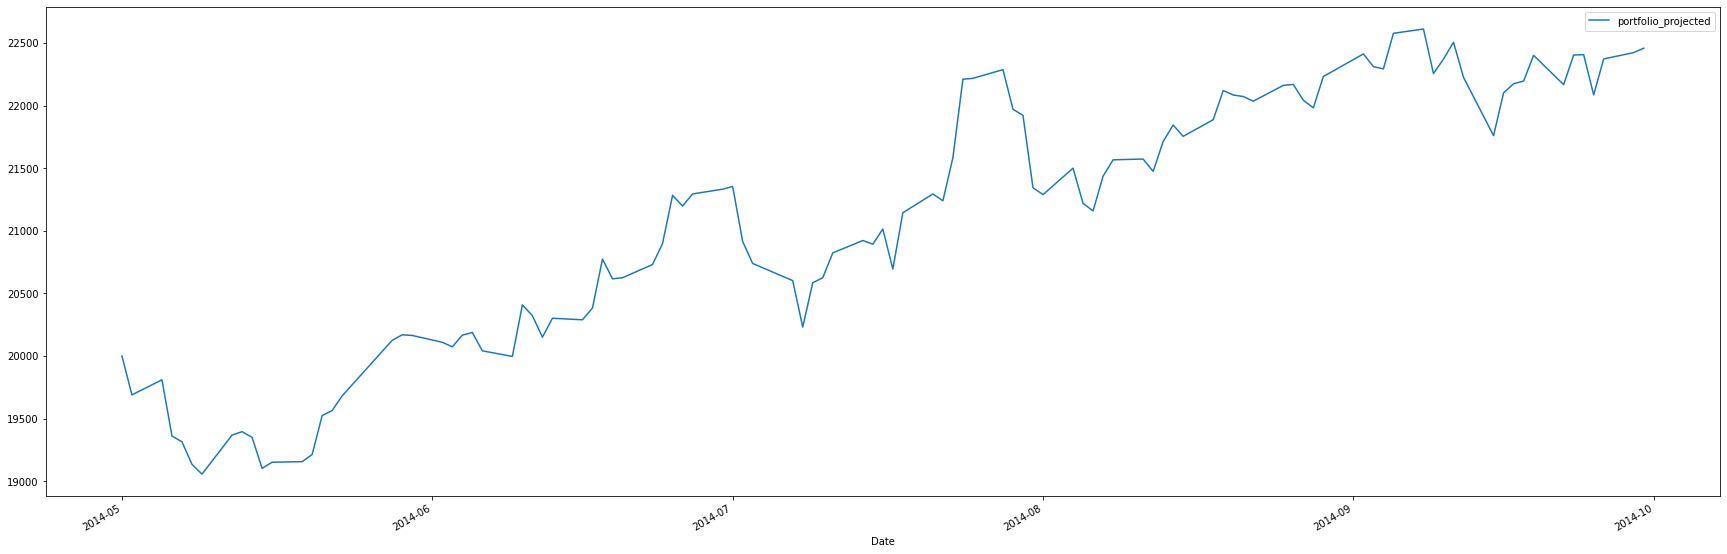

In [46]:
df_portfolio.loc[:,['portfolio_projected']].plot(figsize=(30,10))

In [43]:
df_data=pd.concat([
                   df_portfolio['portfolio_projected_return_normalised'],
                   df['SP500_normalised_diff_1']
                  ],axis=1
                )


ols_model=smf.ols(
    'portfolio_projected_return_normalised ~ SP500_normalised_diff_1',
    data=df_data
)

ols_model=ols_model.fit()
print(ols_model.summary())

                                      OLS Regression Results                                     
Dep. Variable:     portfolio_projected_return_normalised   R-squared:                       0.375
Model:                                               OLS   Adj. R-squared:                  0.369
Method:                                    Least Squares   F-statistic:                     61.69
Date:                                   Fri, 08 Apr 2022   Prob (F-statistic):           4.02e-12
Time:                                           13:46:18   Log-Likelihood:                 358.14
No. Observations:                                    105   AIC:                            -712.3
Df Residuals:                                        103   BIC:                            -707.0
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    